# 1. A simple MATLAB function

In [2]:
import numpy as np

# identity matrix
A = np.eye(5, dtype=int)

print(A)

[[1 0 0 0 0]
 [0 1 0 0 0]
 [0 0 1 0 0]
 [0 0 0 1 0]
 [0 0 0 0 1]]


# 2. Linear regression with one variable
## 2.1 Plotting the data

[[ 6.1101  17.592  ]
 [ 5.5277   9.1302 ]
 [ 8.5186  13.662  ]
 [ 7.0032  11.854  ]
 [ 5.8598   6.8233 ]
 [ 8.3829  11.886  ]
 [ 7.4764   4.3483 ]
 [ 8.5781  12.     ]
 [ 6.4862   6.5987 ]
 [ 5.0546   3.8166 ]
 [ 5.7107   3.2522 ]
 [14.164   15.505  ]
 [ 5.734    3.1551 ]
 [ 8.4084   7.2258 ]
 [ 5.6407   0.71618]
 [ 5.3794   3.5129 ]
 [ 6.3654   5.3048 ]
 [ 5.1301   0.56077]
 [ 6.4296   3.6518 ]
 [ 7.0708   5.3893 ]
 [ 6.1891   3.1386 ]
 [20.27    21.767  ]
 [ 5.4901   4.263  ]
 [ 6.3261   5.1875 ]
 [ 5.5649   3.0825 ]
 [18.945   22.638  ]
 [12.828   13.501  ]
 [10.957    7.0467 ]
 [13.176   14.692  ]
 [22.203   24.147  ]
 [ 5.2524  -1.22   ]
 [ 6.5894   5.9966 ]
 [ 9.2482  12.134  ]
 [ 5.8918   1.8495 ]
 [ 8.2111   6.5426 ]
 [ 7.9334   4.5623 ]
 [ 8.0959   4.1164 ]
 [ 5.6063   3.3928 ]
 [12.836   10.117  ]
 [ 6.3534   5.4974 ]
 [ 5.4069   0.55657]
 [ 6.8825   3.9115 ]
 [11.708    5.3854 ]
 [ 5.7737   2.4406 ]
 [ 7.8247   6.7318 ]
 [ 7.0931   1.0463 ]
 [ 5.0702   5.1337 ]
 [ 5.8014   1

Text(0, 0.5, 'Profit in $10,000s')

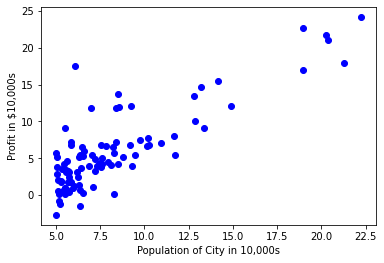

In [3]:
import os
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt

# load data
datafile_1_path = Path(os.path.abspath('')).absolute() / "data" / "ex1data1.txt"
dataset_1 = np.empty(shape=(0, 2))
with open(datafile_1_path, "r") as datafile_1:
    for line in datafile_1:
        coordinates = line.split(",")
        dataset_1 = np.append(dataset_1, [[float(coordinates[0]), float(coordinates[1])]], axis=0)
# reshape X, y to unknown rows, 1 column
X = dataset_1[:, 0].reshape(-1, 1)
y = dataset_1[:, 1].reshape(-1, 1)
print(dataset_1)
print(X)
print(y)

# plotting the data
plt.plot(X, y, "bo")
plt.xlabel("Population of City in 10,000s")
plt.ylabel("Profit in $10,000s")

## 2.2 Gradient Descent
### 2.2.1 Update Equations
### 2.2.2 Implementation

In [6]:
# number of training examples
m = len(X)
# insert 0 as X_0
X = np.ma.column_stack((np.zeros(m), X))
print(X)
# init theta
theta = np.zeros((2,1))
print(theta)
iterations = 1500
alpha = 0.01


[[0.0 0.0 0.0 6.1101]
 [0.0 0.0 0.0 5.5277]
 [0.0 0.0 0.0 8.5186]
 [0.0 0.0 0.0 7.0032]
 [0.0 0.0 0.0 5.8598]
 [0.0 0.0 0.0 8.3829]
 [0.0 0.0 0.0 7.4764]
 [0.0 0.0 0.0 8.5781]
 [0.0 0.0 0.0 6.4862]
 [0.0 0.0 0.0 5.0546]
 [0.0 0.0 0.0 5.7107]
 [0.0 0.0 0.0 14.164]
 [0.0 0.0 0.0 5.734]
 [0.0 0.0 0.0 8.4084]
 [0.0 0.0 0.0 5.6407]
 [0.0 0.0 0.0 5.3794]
 [0.0 0.0 0.0 6.3654]
 [0.0 0.0 0.0 5.1301]
 [0.0 0.0 0.0 6.4296]
 [0.0 0.0 0.0 7.0708]
 [0.0 0.0 0.0 6.1891]
 [0.0 0.0 0.0 20.27]
 [0.0 0.0 0.0 5.4901]
 [0.0 0.0 0.0 6.3261]
 [0.0 0.0 0.0 5.5649]
 [0.0 0.0 0.0 18.945]
 [0.0 0.0 0.0 12.828]
 [0.0 0.0 0.0 10.957]
 [0.0 0.0 0.0 13.176]
 [0.0 0.0 0.0 22.203]
 [0.0 0.0 0.0 5.2524]
 [0.0 0.0 0.0 6.5894]
 [0.0 0.0 0.0 9.2482]
 [0.0 0.0 0.0 5.8918]
 [0.0 0.0 0.0 8.2111]
 [0.0 0.0 0.0 7.9334]
 [0.0 0.0 0.0 8.0959]
 [0.0 0.0 0.0 5.6063]
 [0.0 0.0 0.0 12.836]
 [0.0 0.0 0.0 6.3534]
 [0.0 0.0 0.0 5.4069]
 [0.0 0.0 0.0 6.8825]
 [0.0 0.0 0.0 11.708]
 [0.0 0.0 0.0 5.7737]
 [0.0 0.0 0.0 7.8247]
 [0.0 0.0 0.